## Multi Variable Regression

### Multi-Variable Linear Regression
* 입력 변수가 1개가 아닌 여러개인 경우 다변수 선형회귀
    * bias 도 입력 변수가 1인 것으로 생각할 수 있다
    * $y = W_0X_0 + W_1X_1 + W_2X_2$
        * $W_0$ : 상수, bias
        * $X_0$ : 1
        * $W_n$ : n번째 계수
        * $X_n$ : n번째 입력 변수
![image.png](https://i.imgur.com/ttVB6jg.png)

### 행렬곱
* 각각의 입력 변수에 대해서 미분을 하기 불편하므로 행렬 연산을 한다.
* 행렬곱 연산은 각각의 계수를 개별적으로 찾는 것을 쉽게 해준다.
* 이 때 전치행렬(Transpose)가 쓸모 있다.
![image.png](https://i.imgur.com/netr7gv.png)

### 행렬곱을 이용한 연산
* $H(X) = WX + b$
* $\begin{bmatrix} w1 & w2 & w3 \end{bmatrix} \times \begin{bmatrix} x1 \\ x2 \\x3\end{bmatrix} = 
\begin{bmatrix} w1 \times x1 + w2 \times x2 + w3 \times x3 \end{bmatrix}$

### bias 제거 단순화
* $H(X) = WX$
*  $\begin{bmatrix} b & w1 & w2 & w3 \end{bmatrix} \times \begin{bmatrix} 1\\ x1 \\ x2 \\x3\end{bmatrix} = 
\begin{bmatrix}b \times 1 +  w1 \times x1 + w2 \times x2 + w3 \times x3 \end{bmatrix}$

### 전치 행렬
* Transpose
![image.png](https://i.imgur.com/0MClWDZ.png)

### 전치행렬을 이용한 연산
* $W = \begin{bmatrix} b\\w1\\w2\\w3\end{bmatrix}, x = \begin{bmatrix} 1 \\x1\\x2\\x3\end{bmatrix}$ 일때
* $H(X) = W^TX$
* $ =  \begin{bmatrix}b & w1 & w2 & w3\end{bmatrix} 
 \times \begin{bmatrix} 1 \\ x1 \\ x2 \\ x3 \end{bmatrix} = 
\begin{bmatrix}b \times1 + w1 \times x1 + w2 \times x2 + w3 \times x3 \end{bmatrix}
$


### 2과목 점수 계산 예제
* 2과목의 시험 점수로 학점을 계산하는 예제를 만들어 보자.
    * 3개의 변수를 사용한다.
        * $x_0$ = 1, bias, 50점 기본점수
        * $x_1$ = 0~50, 가중치 0.7
        * $x_2$ = 0~50, 가중치 0.3
        * $y = 50x_0 + 0.7x_1 + 0.3x_2$

[[ 4.  4.]
 [11. 27.]
 [32. 39.]
 [12. 33.]
 [24. 16.]
 [33.  7.]
 [ 6. 44.]
 [16. 43.]
 [13. 46.]
 [40. 29.]]
[[54. ]
 [65.8]
 [84.1]
 [68.3]
 [71.6]
 [75.2]
 [67.4]
 [74.1]
 [72.9]
 [86.7]]


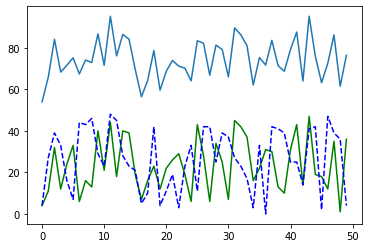

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

m = 50
TRUE_b, TRUE_W1, TRUE_W2 = 50, 0.7, 0.3

x = np.ones((m,2), dtype=np.float32)
x[:, 0] = np.random.randint(0, 50, (m))
x[:, 1] = np.random.randint(0, 50, (m))
y = x[:, 0] * TRUE_W1 + x[:, 1] * TRUE_W2 +  TRUE_b 
y = y.reshape(-1,1)
print(x[:10])
print(y[:10])

plt.plot(np.arange(m), x[:,0], 'g-')
plt.plot(np.arange(m), x[:,1], 'b--')
plt.plot(np.arange(m), y)

### 개별 변수로 구현
* 개별 변수 선언

```
x1 = x[:,0]
x2 = x[:,1]

W1 = tf.Variable(tf.random.normal([1]))
W2 = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
```

* ` hypothesis = W1 * x1 + W2 * x2 + b`

In [39]:
tf.random.set_seed(1)

x1 = x[:,0].reshape(-1,1)
x2 = x[:,1].reshape(-1,1)

W1 = tf.Variable(tf.random.normal([1]))
W2 = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.0005
epochs = 40001

for epoch in range(epochs):
        with tf.GradientTape() as tape:
            hypothesis = W1 * x1 + W2 * x2 + b
            cost = tf.reduce_mean(tf.square(hypothesis - y))
        dw1, dw2, db = tape.gradient(cost, [W1, W2, b])
        
        W1.assign_sub(learning_rate * dw1)
        W2.assign_sub(learning_rate * dw2)
        b.assign_sub(learning_rate * db)
        
        if epoch % 2000 == 0 :
            print('epoch:{}, cost:{}, W1:{}, W2:{}, bias:{}'.format(epoch, cost, W1.numpy(), W2.numpy(), b.numpy()))
print('Final W1:{}, W2:{}, bias:{}'.format(W1.numpy(), W2.numpy(), b.numpy()))

epoch:0, cost:8648.724609375, W1:[1.3092407], W2:[2.7393773], bias:[-0.36688012]
epoch:2000, cost:189.63526916503906, W1:[1.4620082], W2:[0.9358226], bias:[10.4593935]
epoch:4000, cost:116.78429412841797, W1:[1.2979878], W2:[0.79896337], bias:[18.970413]
epoch:6000, cost:71.91999816894531, W1:[1.1692723], W2:[0.69156265], bias:[25.649458]
epoch:8000, cost:44.290897369384766, W1:[1.0682623], W2:[0.60727954], bias:[30.890865]
epoch:10000, cost:27.275867462158203, W1:[0.9889945], W2:[0.541138], bias:[35.004078]
epoch:12000, cost:16.79751968383789, W1:[0.9267894], W2:[0.48923397], bias:[38.2319]
epoch:14000, cost:10.344476699829102, W1:[0.87797314], W2:[0.4485015], bias:[40.764973]
epoch:16000, cost:6.370538234710693, W1:[0.8396652], W2:[0.4165372], bias:[42.752773]
epoch:18000, cost:3.9232003688812256, W1:[0.8096025], W2:[0.3914527], bias:[44.31273]
epoch:20000, cost:2.4160666465759277, W1:[0.7860111], W2:[0.371768], bias:[45.536884]
epoch:22000, cost:1.4879018068313599, W1:[0.76749736], 

### Matrix로 구현
* `W = tf.Variable(tf.random.normal([2,1]))`
* `hypothesis = tf.matmul(x, W) + b`

In [33]:
tf.random.set_seed(1)


W = tf.Variable(tf.random.normal([2,1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.0005
epochs = 40001

for epoch in range(epochs):
        with tf.GradientTape() as tape:
            hypothesis = tf.matmul(x, W) + b
            cost = tf.reduce_mean(tf.square(hypothesis - y))
        dw, db = tape.gradient(cost, [W, b])
        
        W.assign_sub(learning_rate * dw)
        b.assign_sub(learning_rate * db)
        
        if epoch % 2000 == 0 :
            print('epoch:{}, cost:{}, W:{}, bias:{}'.format(epoch, cost, W.numpy(), b.numpy()))
print('Final W:{}, bias:{}'.format(W.numpy(), b.numpy()))

epoch:0, cost:4401.63916015625, W:[[0.5933862]
 [2.8139913]], bias:[0.46214783]
epoch:2000, cost:183.3568878173828, W:[[1.4492881 ]
 [0.92520887]], bias:[11.119446]
epoch:4000, cost:112.9178695678711, W:[[1.2880058 ]
 [0.79063416]], bias:[19.488388]
epoch:6000, cost:69.53894805908203, W:[[1.161439  ]
 [0.68502635]], bias:[26.055939]
epoch:8000, cost:42.82461929321289, W:[[1.0621153 ]
 [0.60215044]], bias:[31.209837]
epoch:10000, cost:26.372936248779297, W:[[0.9841708 ]
 [0.53711313]], bias:[35.25438]
epoch:12000, cost:16.241456985473633, W:[[0.923004 ]
 [0.4860753]], bias:[38.428326]
epoch:14000, cost:10.002049446105957, W:[[0.8750027 ]
 [0.44602287]], bias:[40.919113]
epoch:16000, cost:6.159633636474609, W:[[0.83733386]
 [0.41459188]], bias:[42.873745]
epoch:18000, cost:3.793325901031494, W:[[0.80777305]
 [0.38992622]], bias:[44.407658]
epoch:20000, cost:2.336060047149658, W:[[0.78457505]
 [0.37056977]], bias:[45.6114]
epoch:22000, cost:1.4386286735534668, W:[[0.7663704 ]
 [0.35537973